## **How PCA Works**

In [1]:
# Dependencies
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from ipywidgets import interact, interactive, FloatText
# from src.dataBuilder import generateGaussian
%matplotlib inline

In [2]:
# Parameters
num_sets = 1          # number of Gaussian clusters
num_points = 100      # number of points
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility
cov = [[5,4],         # covariance matrix
       [4,12]]

# Generate Gaussian-distributed data
data = np.random.multivariate_normal([6,10], cov, size=num_points)
subset_indices = np.random.choice(data.shape[0], 10, replace=False)
data_subset = data[subset_indices]


#### Suppose we want to create a single number line to capture the relationships between these points. Maybe you're tired and don't want to look at 2D-data.

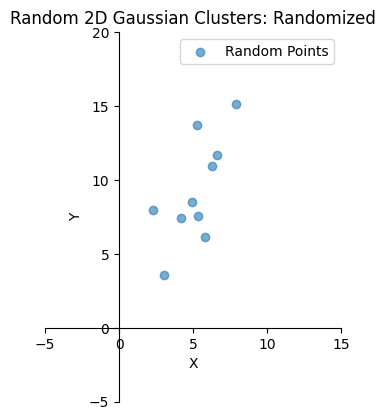

In [3]:
# Create the plot
fig, ax = plt.subplots()    
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 20)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Plot data 
plt.scatter(data_subset[:, 0],
            data_subset[:, 1],
            alpha=0.6,
            label='Random Points'
            )

plt.title('Random 2D Gaussian Clusters: Randomized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### We can try just projecting them onto the X (or Y) axis, which will give us a number line.

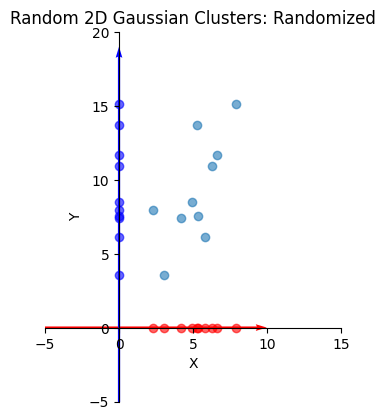

In [4]:
data_subset = data[subset_indices]

# Create the plot
fig, ax = plt.subplots()    
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 20)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Plot data 
plt.scatter(data_subset[:, 0],
            data_subset[:, 1],
            alpha=0.6,
            label='Random Points'
            )
plt.scatter(data_subset[:, 0],
            np.zeros(data_subset.shape[0]),
            alpha=0.6,
            label='Random Points Projected onto X-axis',
            color='red'
            )
plt.scatter(np.zeros(data_subset.shape[0]),
            data_subset[:, 1],
            alpha=0.6,
            label='Random Points Projected onto X-axis',
            color='blue'
            )

ax.quiver(0, 0,  10,  0, angles='xy', scale_units='xy', scale=1, color='red', label='Number Line (X-axis)')
ax.quiver(0, 0, -10, 0, angles='xy', scale_units='xy', scale=1, color='red')
ax.quiver(0, 0,  0,  19, angles='xy', scale_units='xy', scale=1, color='blue', label='Number Line (X-axis)')
ax.quiver(0, 0, 0, -10, angles='xy', scale_units='xy', scale=1, color='blue')

plt.title('Random 2D Gaussian Clusters: Randomized')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend()
plt.show()

#### The red axis **captures how close the points are horizontally**, and we get a pretty good sense of where the x-mean is.

#### However, it **doesn't capture how close the points are *vertically***. We can see this on the blue axis, which shows how spread apart these points are vertically! 

#### Of course, we have the same problem with the blue axis, as it only captures information about **how close the points are vertically**.

#### Our job is to figure out what the **best axis to plot this "number line" is**. We'll call this axis the **"principal axis"**.

#### Suppose we have the below data.

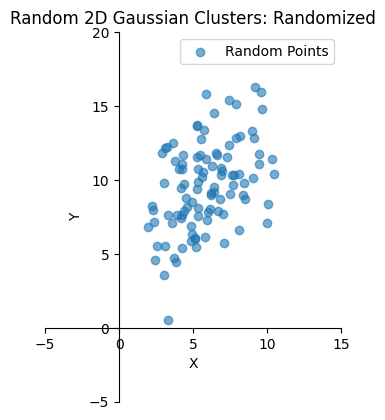

In [5]:
# Create the plot
fig, ax = plt.subplots()    
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 20)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Plot data 
plt.scatter(data[:, 0],
            data[:, 1],
            alpha=0.6,
            label='Random Points'
            )

plt.title('Random 2D Gaussian Clusters: Randomized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Let's standardize (subtract by mean and divide by standard deviation) this data to make our lives easier (we'll see why this is important later)...

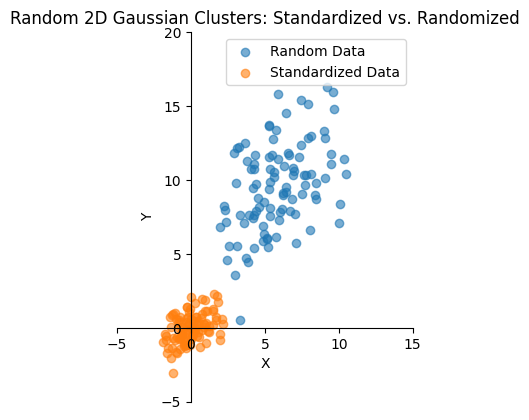

In [6]:
# Create the plot
fig, ax = plt.subplots()    
ax.set_xlim(-5, 15)
ax.set_ylim(-5, 20)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Standardize the data
data_std = (data - data.mean(axis=0)) / data.std(axis=0)

# Plot data and its standardizd version
plt.scatter(data[:, 0],
            data[:, 1],
            alpha=0.6,
            label='Random Data'
            )
plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data'
            )

plt.title('Random 2D Gaussian Clusters: Standardized vs. Randomized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### ...and take a closer look at what we're dealing with.

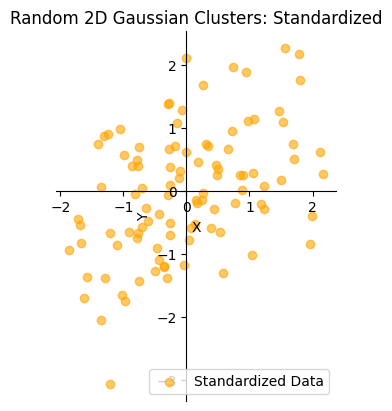

In [7]:
# Create the plot
fig, ax = plt.subplots()    
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )

plt.title('Random 2D Gaussian Clusters: Standardized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### The question now is, what's a good set of axes that accurately captures the relationships between data points?

#### In other words, we want something like this:

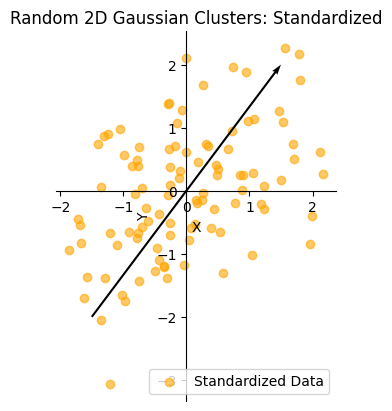

In [8]:
# Create the plot
fig, ax = plt.subplots()    
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )

ax.quiver(-1.5, -2, 6, 8, angles='xy', scale_units='xy', scale=2)
#ax.quiver(0, 0, data_std[10][0], data_std[10][1], angles='xy', scale_units='xy', scale=1)

plt.title('Random 2D Gaussian Clusters: Standardized')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### This is kind of the "best of both worlds"; it captures both **how close the points are horizontally *and* vertically**.

#### We have to be careful though; if the points are spread out more *vertically* than *horizontally*, our **axis needs to be steeper to "capture the vertical spread"**.

#### Similiarly, if the points are spread out more *horizontally* than *vertically*, our **axis needs to be shallower to "capture the horizontal spread"**.

#### ***We'll visualize this more; keep reading!***

#### So how do we do this?

> # **The Big Idea 1**
> #### ***The best axis is the one that's closest to all the points***

#### Let us explain.

#### We can measure how far the points are from the axis by **subtracting the projection vector from the data vector**.

#### We do this by using the familiar projection formula from MATH 18 and 20C:

$$
\begin{aligned}
\text{Proj}_{\textbf{u}}\textbf{v} = 
\frac{\textbf{u} \cdot \textbf{v}}{\lVert\textbf{u}\rVert^2}\textbf{u}
\end{aligned}
$$

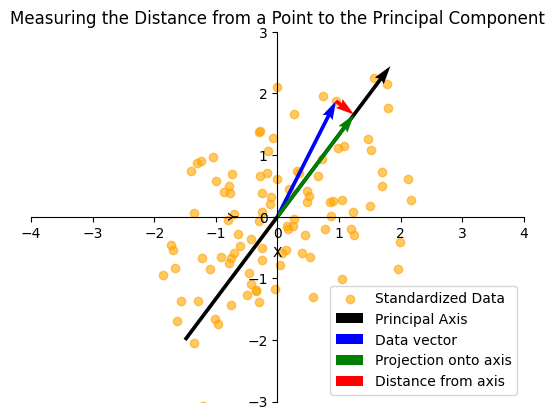

In [9]:
# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Implementing projection formula
u = np.array([3, 4]) # Our Principal Component
v = data_std[10] # A data point
u_dot_v = np.dot(u, v)
u_norm = np.linalg.norm(u)

projection = (u_dot_v / u_norm**2) * u

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )

ax.quiver(-1.5,
          -2,
          6,
          8,
          angles='xy', scale_units='xy', scale=1.8, label='Principal Axis') # vector u
ax.quiver(0,
          0,
          data_std[10][0],
          data_std[10][1],
          angles='xy', scale_units='xy', scale=1, color='blue', label='Data vector') # vector v
ax.quiver(0,
          0,
          projection[0],
          projection[1],
          angles='xy', scale_units='xy', scale=1, color='green', label='Projection onto axis') # projection
ax.quiver(data_std[10][0],
          data_std[10][1],
          projection[0]-data_std[10][0],
          projection[1]-data_std[10][1],
          angles='xy', scale_units='xy', scale=1, color='red', label='Distance from axis') # residual vector


plt.title('Measuring the Distance from a Point to the Principal Component')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Let's do this for a couple of our data points:

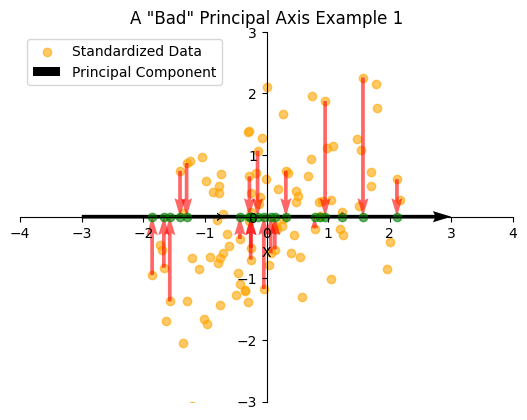

In [10]:
# A "bad" principal component example 1
np.random.seed(42) # for reproducibility

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )


v_start = [-3, 0]
v_end = [3, 0]
ax.quiver(v_start[0],
          v_start[1],
          v_end[0]-v_start[0],
          v_end[1]-v_start[1],
          angles='xy', scale_units='xy', scale=1, label='Principal Component') # vector u

for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    # Calculate projections for 10 random points!
    u = np.array([v_end[0]-v_start[0], v_end[1]-v_start[1]]) # Our principal component
    v = data_std[i] # A data point
    u_dot_v = np.dot(u, v) # Dot product between data point and principal component
    u_norm = np.linalg.norm(u) # Norm of principal component vector
    projection = (u_dot_v / u_norm**2) * u
    ax.quiver(data_std[i][0],
              data_std[i][1],
              projection[0]-data_std[i][0],
              projection[1]-data_std[i][1],
              angles='xy', scale_units='xy', scale=1, alpha=0.6, color='red') # residual vector
    
    plt.scatter(projection[0],
                projection[1],
                alpha=0.6,
                color='green'
                )

plt.title('A "Bad" Principal Axis Example 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### We can see that while the axis may capture the horizontal spread, **it doesn't capture the vertical spread at all**. We can see this because **vertical distance from the points to the axis is huge for most of our points.**

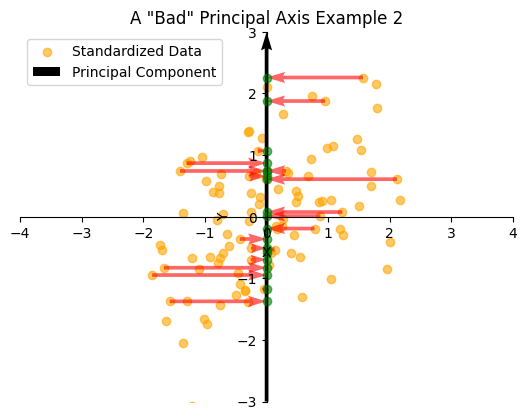

In [11]:
# A "bad" principal component example
np.random.seed(42) # for reproducibility

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )


v_start = [0, -3]
v_end = [0, 3]
ax.quiver(v_start[0],
          v_start[1],
          v_end[0]-v_start[0],
          v_end[1]-v_start[1],
          angles='xy', scale_units='xy', scale=1, label='Principal Component') # vector u

for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    # Calculate projections for 10 random points!
    u = np.array([v_end[0]-v_start[0], v_end[1]-v_start[1]]) # Our principal component
    v = data_std[i] # A data point
    u_dot_v = np.dot(u, v) # Dot product between data point and principal component
    u_norm = np.linalg.norm(u) # Norm of principal component vector
    projection = (u_dot_v / u_norm**2) * u
    ax.quiver(data_std[i][0],
              data_std[i][1],
              projection[0]-data_std[i][0],
              projection[1]-data_std[i][1],
              angles='xy', scale_units='xy', scale=1, alpha=0.6, color='red') # residual vector
    plt.scatter(projection[0],
                projection[1],
                alpha=0.6,
                color='green'
                )
    
plt.title('A "Bad" Principal Axis Example 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Similiarly, we can see that while the axis may capture the vertical spread, **it doesn't capture the horiontal spread at all**. We can see this because **horizontal distance from the points to the axis is huge for most of our points.**

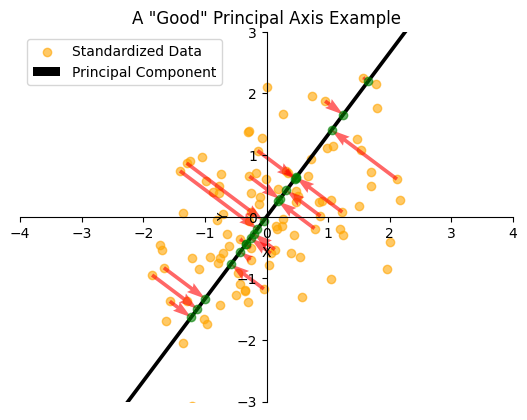

In [12]:
# A "Good" principal axis example
np.random.seed(42) # for reproducibility

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.scatter(data_std[:, 0],
            data_std[:, 1],
            alpha=0.6,
            label='Standardized Data',
            color='orange'
            )

v_start = [-3, -4]
v_end = [3, 4]
ax.quiver(v_start[0],
          v_start[1],
          v_end[0]-v_start[0],
          v_end[1]-v_start[1],
          angles='xy', scale_units='xy', scale=1, label='Principal Component') # vector u

for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
    # Calculate projections for 10 random points!
    u = np.array([v_end[0]-v_start[0], v_end[1]-v_start[1]]) # Our principal component
    v = data_std[i] # A data point
    u_dot_v = np.dot(u, v) # Dot product between data point and principal component
    u_norm = np.linalg.norm(u) # Norm of principal component vector
    projection = (u_dot_v / u_norm**2) * u
    ax.quiver(data_std[i][0],
              data_std[i][1],
              projection[0]-data_std[i][0],
              projection[1]-data_std[i][1],
              angles='xy', scale_units='xy', scale=1, alpha=0.6, color='red') # residual vector
    plt.scatter(projection[0],
                projection[1],
                alpha=0.6,
                color='green'
                )

plt.title('A "Good" Principal Axis Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Meanwhile, we see that this axis captures **both the horizontal and vertical spread pretty well**, as its **distance from the points are reasonably smaller.**

#### Notice how the spacing on the green projections changes with different principal axes. Note how **bad principal axes can trick you into thinking two points are close when they're really not.**

#### With the below interactive, do you think you can find the "best" axis?

In [13]:
# For our slider to update, we have to draw a new plot each time. 
# The idea is to put plot(angle) inside a function that sets angle to the value from the slider.
np.random.seed(42) # for reproducibility
length = 4 # length of principal component vector

def plot(angle):
    # Create the plot
    fig, ax = plt.subplots()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Plot our data
    plt.scatter(data_std[:, 0],
                data_std[:, 1],
                alpha=0.6,
                label='Standardized Data',
                color='orange'
                )
    
    # For our slider, we want to paraterize direction in degrees
    direction = np.deg2rad(angle)
    a = length * np.cos(direction) 
    b = length * np.sin(direction)

    # Because ax.quiver is a bit weird, we'll just draw two arrows in opposite directions for our principal components
    ax.quiver(0, 0,  a,  b, angles='xy', scale_units='xy', scale=1, color='black')
    ax.quiver(0, 0, -a, -b, angles='xy', scale_units='xy', scale=1, color='black')

    np.random.seed(42) 
    for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
        # Calculate projections for 10 random points!
        u = np.array([a, b]) # Our principal component
        v = data_std[i] # A data point
        u_dot_v = np.dot(u, v) # Dot product between data point and principal component
        u_norm = np.linalg.norm(u) # Norm of principal component vector
        projection = (u_dot_v / u_norm**2) * u
        ax.quiver(data_std[i][0],
                data_std[i][1],
                projection[0]-data_std[i][0],
                projection[1]-data_std[i][1],
                angles='xy', scale_units='xy', scale=1, alpha=0.6, color='red') # residual vector
        plt.scatter(projection[0],
                    projection[1],
                    alpha=0.6,
                    color='green'
                    )

    plt.title('Can You Find the "Right" Principal Component?')

interact(plot, angle=(0, 360, 1));

interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

#### You probably had some good guesses, but **we'll show you how to pinpoint one mathematically**.

#### The formula for distance to the principal component is

$$
\textbf{d} = 
\tilde{\textbf{x}} - {Proj}_{\textbf{p}}\tilde{\textbf{x}} = 
\tilde{\textbf{x}} - \frac{\textbf{p} \cdot \tilde{\textbf{x}}}
{||\textbf{p}||^2}\textbf{p}
$$

#### Where:


- $\textbf{d} \text{ is the distance to principal component}$
- $\tilde{\textbf{x}}=\textbf{x}-\boldsymbol{\mu} \text{ is the standardized data point AFTER } \textbf{x} \text{ has been divided by the standard deviation.}$
- $\textbf{p} \text{ is the principal component vector}$

#### We see that a "good" principal component should have the **least distance between the points and principal component!**

#### What we need to do is to **find a vector** that **minimizes the total distance between the points and the lines!**

> # **The Big Idea 2**
> #### ***We need to find a ``principal_component`` that **minimizes** ``sum``!***

```python
sum = 0
for data in data_points:
    sum += distance(data, principal_component)
```

#### Because just we just need to find a direction, we can put a constraint that ``magnitude(principal_component)`` is 1.

#### This has no effect on the problem that we're solving, and makes our math easier!

#### Written in big scary math, it looks like this!

$$
\begin{aligned}
\displaystyle \min_{\textbf{p}}\sum_{i}\textbf{||d||} = 
\displaystyle \min_{\textbf{p}}\sum_{i}||\tilde{\textbf{x}}_{i} - \text{Proj}_{\textbf{p}}\tilde{\textbf{x}}_{i}|| \\
= \displaystyle \min_{\textbf{p}}\sum_{i}||\tilde{\textbf{x}}_{i} - \frac{\textbf{p} \cdot \tilde{\textbf{x}}_{i}}
{||\textbf{p}||^2}\textbf{p}||
\end{aligned}
$$


#### You might be thinking,

> #### *But aren't there infinitely many principal components we need to check? I mean, even our slider had 360 angles to choose for how our principal component looked like!*

#### This is where we have to do some math; **don't worry, it's just algebra.**

<details>
  <summary style="font-size: 1.3em; font-weight: bold; padding: 8px; cursor: pointer;">
    "Find principal component <strong>p</strong> that minimizes the distance between points <strong>x̃</strong> and principal component <strong>p</strong>"
  </summary>

  <div style="margin-left: 10px;">

  $$
  \begin{aligned}
  \min_{\mathbf{p}} \sum_{i} \lVert \mathbf{d} \rVert^2 
  &= \min_{\mathbf{p}} \sum_{i} \lVert \tilde{\mathbf{x}}_{i} - \mathrm{Proj}_{\mathbf{p}} \tilde{\mathbf{x}}_{i} \rVert^2 \\
  &= \min_{\mathbf{p}} \sum_{i} \left\lVert \tilde{\mathbf{x}}_{i} - 
  \frac{\mathbf{p} \cdot \tilde{\mathbf{x}}_{i}}{\lVert \mathbf{p} \rVert^2} \mathbf{p} \right\rVert^2 \\ 
  &= \min_{\mathbf{p}} \sum_{i} \left\lVert \tilde{\mathbf{x}}_{i} - 
  (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i}) \mathbf{p} \right\rVert^2 
  && \text{Remember that we defined } \lVert \textbf{p} \rVert^2 = 1
  \end{aligned}
  $$
  <em>Note 1.</em> We use norm square it (i.e., "un-root it") instead of norm because:
  - it makes our math easier
  - it's easier to compute
  - it has no overall effect on our solution
  
  <em>Note 2.</em> On line 4, because we defined principal component <strong>p</strong> to be a unit vector.
  </div>
</details>


<details>
  <summary style="font-size: 1.3em; font-weight: bold; padding: 8px; cursor: pointer;">
    Some algebra...
  </summary>

  <div style="margin-left: 10px;">

  $$
  \begin{aligned}
  \min_{\mathbf{p}} \sum_{i} \left\lVert \tilde{\mathbf{x}_{i}} - 
  (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i}) \mathbf{p} \right\rVert^2 &= 
  \min_{\mathbf{p}} \sum_{i} (\tilde{\mathbf{x}}_{i}^2 - 2( (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i}) \mathbf{p})\tilde{\mathbf{x}}_{i} + ((\mathbf{p} \cdot \tilde{\mathbf{x}}_{i}) \mathbf{p})^2)  \\
  &= \min_{\mathbf{p}} \sum_{i} (\tilde{\mathbf{x}}_{i}^2 - 2(\mathbf{p} \cdot \tilde{\mathbf{x}}_{i})(\mathbf{p} \cdot \tilde{\mathbf{x}}_{i}) + (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i})^2\mathbf{p}^2) 
  && \text{Let's not forget that } \mathbf{p}^2 = \mathbf{p} \cdot \mathbf{p} = \lVert\mathbf{p}\rVert^2 = 1^2 = 1\\
  &= \min_{\mathbf{p}} \sum_{i} (\tilde{\mathbf{x}}_{i}^2 - 2(\mathbf{p} \cdot \tilde{\mathbf{x}}_{i})^2 + (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i})^2) \\
  &= \min_{\mathbf{p}} \sum_{i} (\tilde{\mathbf{x}}_{i}^2 - (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i})^2)
  \end{aligned} \\
  $$

  
  </div>
</details>


<details>
  <summary style="font-size: 1.3em; font-weight: bold; padding: 8px; cursor: pointer;">
    Some more algebra...
  </summary>

  <div style="margin-left: 10px;">

  $$
  \begin{aligned}
  \min_{\mathbf{p}} \sum_{i} (\tilde{\mathbf{x}}_{i}^2 - (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i})^2)
  &= \max_{\mathbf{p}} \sum_{i} (\mathbf{p} \cdot \tilde{\mathbf{x}}_{i})^2
  && \text{Because } \tilde{\mathbf{x}}^2 \text{ is a constant} \\
  &= \max_{\mathbf{p}} \sum_{i} (\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i})^\text{T} (\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i}) 
  && \text{Remembering that } \mathbf{p} \cdot \tilde{\mathbf{x}}_{i}=\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i}\\
  &= \max_{\mathbf{p}} \sum_{i} (\tilde{\mathbf{x}}_{i}^\text{T} \mathbf{p}) (\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i}) \\
  &= \max_{\mathbf{p}} \sum_{i} (\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i}) (\tilde{\mathbf{x}}_{i}^\text{T} \mathbf{p})
  && \text{Scalar commutativity; because } \mathbf{p}^\text{T} \tilde{\mathbf{x}} \text{ is a dot product which produces a scalar} \\ 
  &= \max_{\mathbf{p}} \sum_{i} (\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i}\tilde{\mathbf{x}}_{i}^\text{T} \mathbf{p}) \\ 
  \end{aligned}
  $$

  </div>
</details>


#### We get to something like this.

$$
\begin{aligned}
\min_{\mathbf{p}} \sum_{i} \lVert \mathbf{d} \rVert^2 = \max_{\mathbf{p}} \sum_{i} (\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i}\tilde{\mathbf{x}}_{i}^\text{T} \mathbf{p})
\end{aligned}
$$

#### Remember that in statistics, the covariance matrix is defined as 

$$
\begin{aligned}
\textbf{S} = \frac{1}{N}\sum_{i}(\textbf{x}_{i} - \boldsymbol{\mu})(\textbf{x}_{i} - \boldsymbol{\mu})^\text{T}
\end{aligned}
$$

#### Remember also that we defined $\tilde{\textbf{x}}=\textbf{x}-\boldsymbol{\mu}$. Putting this all together,

$$
\begin{aligned}
\textbf{S} = \frac{1}{N}\sum_{i}(\tilde{\textbf{x}_{i}})(\tilde{\textbf{x}}_{i})^\text{T}\\ 
\end{aligned}
$$

<details>
  <summary style="font-size: 1.3em; font-weight: bold; padding: 8px; cursor: pointer;">
    Even more algebra...
  </summary>

  <div style="margin-left: 10px;">

  $$
  \begin{aligned}
  \max_{\mathbf{p}} \sum_{i} (\mathbf{p}^\text{T} \tilde{\mathbf{x}}_{i}\tilde{\mathbf{x}}_{i}^\text{T} \mathbf{p}) 
  &= \max_{\mathbf{p}} \mathbf{p}^\text{T} \sum_{i}(\tilde{\mathbf{x}}_{i}\tilde{\mathbf{x}}_{i}^\text{T}) \mathbf{p}
  && \textbf{p} \text{ is not indexed by } i \text{, so we can move it to the outside.} \\ 
  &= \max_{\mathbf{p}} \mathbf{p}^\text{T} N\textbf{S} \mathbf{p} \\ 
  &= \max_{\mathbf{p}} \mathbf{p}^\text{T} \textbf{S} \mathbf{p}
  && N \text{ is a constant, and so we just need } \mathbf{p}^\text{T} \textbf{S} \mathbf{p} \text{ to hit the maximum.}
  \end{aligned}
  $$

  </div>
</details>


#### We (finally) end here.
$$
\begin{aligned}
\min_{\mathbf{p}} \sum_{i} \lVert \mathbf{d} \rVert^2 = \max_{\mathbf{p}} \mathbf{p}^\text{T} \textbf{S} \mathbf{p}
\end{aligned}
$$

#### The right-hand equation is actually very well known; it's related to a special case of the *"Rayleigh Quotient"*, and it's know that the **eigenvectors with the largest eigenvalues of S maximize this value** (i.e., the "biggest" eigenvectors)

> # **The Big Idea 3**
> #### ***If we want the "best" principal component, we're looking for the **"biggest" eigenvectors of S!!*****

#### Let's see what happens when we use the "biggest" eigenvectors of **S** as our principal axes.

In [14]:
# Some pre-computations for visualization

# Calculating covariance matrix and its eigenvalues/vectors
S = data_std.T @ data_std # We don't need to normalize by n-1 for PCA; scalar multiples do not affect eigenvectors
eigvals, eigvecs = np.linalg.eig(S) # eigenvalue decomposition

# Sort by descending eigenvalue
idx = np.argsort(eigvals)[::-1] # np.argsort sorts INDICES that WOULD SORT the array in ascending order; [::-1] reverses the order
eigvals = eigvals[idx] # sorted eigenvalues
eigvecs = eigvecs[:, idx] # sorted eigenvectors

# Top 2 components
W = eigvecs[:, :2] 

k = 2.0  # 2 standard deviations (95% ellipse)
width = 2 * k * np.sqrt(eigvals[0]/data_std.shape[0])  # major axis
height = 2 * k * np.sqrt(eigvals[1]/data_std.shape[0]) # minor axis

# Compute rotation angle (in degrees)
vx, vy = eigvecs[:, 0] # x and y components of the major axis
angle = np.degrees(np.arctan2(vy, vx)) # angle of major axis
mean = np.mean(data_std, axis=0) # (0,0) after standardization


In [15]:
# Plot with eigenvectors and data ellipse

# For our slider to update, we have to draw a new plot each time. 
# The idea is to put plot(angle) inside a function that sets angle to the value from the slider.
np.random.seed(42) # for reproducibility
length = 4 # length of principal component vector

def plot(angle):
        # Create the plot
        fig, ax = plt.subplots()
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.set_aspect('equal')
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        # Plot our data
        plt.scatter(data_std[:, 0],
                    data_std[:, 1],
                    alpha=0.6,
                    label='Standardized Data',
                    color='orange'
                    )

        # For our slider, we want to paraterize direction in degrees
        direction = np.deg2rad(angle)
        a = length * np.cos(direction) 
        b = length * np.sin(direction)

        # Because ax.quiver is a bit weird, we'll just draw two arrows in opposite directions for our principal components
        ax.quiver(0, 0,  a,  b, angles='xy', scale_units='xy', scale=1, color='black')
        ax.quiver(0, 0, -a, -b, angles='xy', scale_units='xy', scale=1, color='black')

        # Note that we calculated eigenvectors for (x-mu)(x-mu)^T, not (x-mu)(x-mu)^T/N, so we need to divide  by N to get the true eigenvalues of the covariance matrix
        # Moreover, we wuliply by 2 because sqrt(eigenvalue) gives variance along that component, so 2*sqrt(eigenvalue/N) includes 2 std devs to cover ~95% of data along that component

        ax.quiver(0,
                  0,
                  W[:, 0][0]*2*np.sqrt(eigvals[0]/data.shape[0]), 
                  W[:, 0][1]*2*np.sqrt(eigvals[0]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='blue', label='Eigenvector 1') # eigevnvector 1
        ax.quiver(0,
                  0,
                  -W[:, 0][0]*2*np.sqrt(eigvals[0]/data.shape[0]),
                  -W[:, 0][1]*2*np.sqrt(eigvals[0]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='blue') # eigevnvector 1
        ax.quiver(0,
                  0,
                  W[:, 1][0]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  W[:, 1][1]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='teal', label='Eigenvector 2') # eigevnvector 2
        ax.quiver(0,
                  0,
                  -W[:, 1][0]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  -W[:, 1][1]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='teal') # eigevnvector 2

        
        # Plot the data ellipse
        # ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='black', facecolor='none', linewidth=2)
        # ax.add_patch(ellipse)
        
        np.random.seed(42) # for reproducibility
        for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
                # Calculate projections for 10 random points!
                u = np.array([a, b]) # Our principal component
                v = data_std[i] # A data point
                u_dot_v = np.dot(u, v) # Dot product between data point and principal component
                u_norm = np.linalg.norm(u) # Norm of principal component vector
                projection = (u_dot_v / u_norm**2) * u
                ax.quiver(data_std[i][0],
                          data_std[i][1],
                          projection[0]-data_std[i][0],
                          projection[1]-data_std[i][1],
                          angles='xy', scale_units='xy', scale=1, alpha=0.6, color='red') # residual vector
                plt.scatter(projection[0],
                            projection[1],
                            alpha=0.6,
                            color='green'
                            ) # data cloud
        plt.legend()
        plt.title('Can You Find the "Right" Principal Component?')
        plt.show()

interact(plot, angle=(0, 360, 1));
# interactive(plot, _angle=FloatText(value=0, description='Angle (°):'))

interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

#### We can visually see that using the eigenvector as the principal axes matches our expectations of a "good" principal axes (minimizes the distance between the points)

#### Now, our main objective was to find a *number line*, so we'd just take one "biggest" eigenvector and discard the rest, but if this data was 3D, we might want to take 2 eigenvectors instead!

#### But what does this all mean?
#### This makes a lot of sense geometrically! 
#### Mathematically, the relationship 
$$
\begin{aligned}
\mathbf{p}^\text{T} \textbf{S} \mathbf{p}
\end{aligned}
$$
#### actually **expand into the equation of an ellipse** (try putting \<x,y\> in **p**, and make up a 2x2 symmetric matrix for **S**.), where the eigenvectors are the major and minor axes.



#### So, **p (the covariance matrix's eigenvectors) plot the axes of the ellipse that represents the covariance of the data.** 

#### But because the covariance measures the spread of data between variables, **the ellipse and its axes end up capturing the "spread" of our data!**

In [16]:
# Plot with eigenvectors and data ellipse

# For our slider to update, we have to draw a new plot each time. 
# The idea is to put plot(angle) inside a function that sets angle to the value from the slider.
np.random.seed(42) # for reproducibility
length = 4 # length of principal component vector

def plot(angle):
        # Create the plot
        fig, ax = plt.subplots()
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.set_aspect('equal')
        ax.spines['left'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

        # Plot our data
        plt.scatter(data_std[:, 0],
                    data_std[:, 1],
                    alpha=0.6,
                    label='Standardized Data',
                    color='orange'
                    )

        # For our slider, we want to paraterize direction in degrees
        direction = np.deg2rad(angle)
        a = length * np.cos(direction) 
        b = length * np.sin(direction)

        # Because ax.quiver is a bit weird, we'll just draw two arrows in opposite directions for our principal components
        ax.quiver(0, 0,  a,  b, angles='xy', scale_units='xy', scale=1, color='black')
        ax.quiver(0, 0, -a, -b, angles='xy', scale_units='xy', scale=1, color='black')

        # Note that we calculated eigenvectors for (x-mu)(x-mu)^T, not (x-mu)(x-mu)^T/N, so we need to divide  by N to get the true eigenvalues of the covariance matrix
        # Moreover, we wuliply by 2 because sqrt(eigenvalue) gives variance along that component, so 2*sqrt(eigenvalue/N) includes 2 std devs to cover ~95% of data along that component

        ax.quiver(0,
                  0,
                  W[:, 0][0]*2*np.sqrt(eigvals[0]/data.shape[0]), 
                  W[:, 0][1]*2*np.sqrt(eigvals[0]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='blue', label='Eigenvector 1') # eigevnvector 1
        ax.quiver(0,
                  0,
                  -W[:, 0][0]*2*np.sqrt(eigvals[0]/data.shape[0]),
                  -W[:, 0][1]*2*np.sqrt(eigvals[0]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='blue') # eigevnvector 1
        ax.quiver(0,
                  0,
                  W[:, 1][0]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  W[:, 1][1]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='teal', label='Eigenvector 2') # eigevnvector 2
        ax.quiver(0,
                  0,
                  -W[:, 1][0]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  -W[:, 1][1]*2*np.sqrt(eigvals[1]/data.shape[0]),
                  angles='xy', scale_units='xy', scale=1, alpha=0.6, color='teal') # eigevnvector 2

        
        # Plot the data ellipse
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='black', facecolor='none', linewidth=2)
        ax.add_patch(ellipse)
        
        np.random.seed(42) # for reproducibility
        for i in np.random.choice(np.arange(data_std.shape[0]), 20, replace=False):
                # Calculate projections for 10 random points!
                u = np.array([a, b]) # Our principal component
                v = data_std[i] # A data point
                u_dot_v = np.dot(u, v) # Dot product between data point and principal component
                u_norm = np.linalg.norm(u) # Norm of principal component vector
                projection = (u_dot_v / u_norm**2) * u
                ax.quiver(data_std[i][0],
                          data_std[i][1],
                          projection[0]-data_std[i][0],
                          projection[1]-data_std[i][1],
                          angles='xy', scale_units='xy', scale=1, alpha=0.6, color='red') # residual vector
                plt.scatter(projection[0],
                            projection[1],
                            alpha=0.6,
                            color='green'
                            ) # data cloud
        plt.legend()
        plt.title('(With Ellipse) Can You Find the "Right" Principal Component?')
        plt.show()

interact(plot, angle=(0, 360, 1));
# interactive(plot, _angle=FloatText(value=0, description='Angle (°):'))

interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

#### Notice how when our principal component is the "biggest" eigenvector, the **the ellipse drawn engulfs the data**!

# That's how PCA Works.